In [1]:
import pandas as pd
import math as m
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats


Bad key "“backend" on line 1 in
/Users/rfdanti/.matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
store = pd.read_csv('DA1920_store.csv')
train_og = pd.read_csv('DA1920_train.csv')
test_og = pd.read_csv('DA1920_test.csv')
store_clean = pd.read_csv('cleansed_store0.1.csv')
train_clean = pd.read_csv('train_merged0.3.csv')
test_clean = pd.read_csv('test_merged0.3.csv')
trainset = pd.read_csv('train_transformed.csv')
testset = pd.read_csv('test_transformed.csv')

/Users/rfdanti/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train_merge = pd.merge(train_og,store,on='Store', how='inner')
test_merge = pd.merge(test_og,store,on='Store', how='inner')

In [3]:
#Checking Store Data: Variable Type & Count
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
 10  Unnamed: 10                0 non-null      float64
 11  Unnamed: 11                1 non-null      object 
dtypes: float64(6), int64(2), object(4)
memory usage: 104.7+ KB


In [7]:
test_og.isnull().sum()

Store                0
DayOfWeek            0
Date                 0
Sales            41088
Customers        41088
Open                11
Promo                0
StateHoliday         0
SchoolHoliday        0
dtype: int64

In [4]:
store.isnull().sum()

Store                           0
StoreType                       0
Assortment                      0
CompetitionDistance             3
CompetitionOpenSinceMonth     354
CompetitionOpenSinceYear      354
Promo2                          0
Promo2SinceWeek               544
Promo2SinceYear               544
PromoInterval                 544
Unnamed: 10                  1115
Unnamed: 11                  1114
dtype: int64

In [9]:
test_og[test_og["Open"].isnull()==True]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
479,622,4,17/09/2015,NaN,NaN,NaN,1,0,0
1335,622,3,16/09/2015,NaN,NaN,NaN,1,0,0
2191,622,2,15/09/2015,NaN,NaN,NaN,1,0,0
3047,622,1,14/09/2015,NaN,NaN,NaN,1,0,0
4759,622,6,12/09/2015,NaN,NaN,NaN,0,0,0
5615,622,5,11/09/2015,NaN,NaN,NaN,0,0,0
6471,622,4,10/09/2015,NaN,NaN,NaN,0,0,0
7327,622,3,09/09/2015,NaN,NaN,NaN,0,0,0
8183,622,2,08/09/2015,NaN,NaN,NaN,0,0,0
9039,622,1,07/09/2015,NaN,NaN,NaN,0,0,0


In [7]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Unnamed: 10
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,0.0
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,NaN


In [8]:
# Number of Unique Values of Store Data
store.agg(['nunique'])

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Unnamed: 10,Unnamed: 11
nunique,1115,4,3,654,12,23,2,24,7,3,0,1


In [9]:
train_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
train_og.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [11]:
# Number of Unique Values of Train Data
train_og.agg(['nunique'])

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
nunique,1115,7,942,21734,4086,2,2,5,2


In [12]:
#Display 181 Stores whose Sales Date is missing (Sales Data are less than 942 rows)
train_og[train_og.groupby('Store')['Date'].transform('nunique') < 942].groupby("Store").agg(['nunique']).stack()

,,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Store,,,,,,,,,
13,nunique,7,758,588,276,2,2,5,2
20,nunique,7,758,586,402,2,2,5,2
22,nunique,7,758,564,282,2,2,5,2
32,nunique,7,758,581,320,2,2,5,2
36,nunique,7,758,582,325,2,2,5,2
41,nunique,7,758,580,265,2,2,5,2
46,nunique,7,758,582,318,2,2,5,2
51,nunique,7,758,586,265,2,2,5,2
52,nunique,7,758,598,294,2,2,5,2


In [13]:
test_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 9 columns):
Store            41088 non-null int64
DayOfWeek        41088 non-null int64
Date             41088 non-null object
Sales            0 non-null float64
Customers        0 non-null float64
Open             41077 non-null float64
Promo            41088 non-null int64
StateHoliday     41088 non-null object
SchoolHoliday    41088 non-null int64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.8+ MB


In [14]:
test_og.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,0.0,0.0,41077.000000,41088.000000,41088.000000
mean,555.899533,3.979167,NaN,NaN,0.854322,0.395833,0.443487
std,320.274496,2.015481,NaN,NaN,0.352787,0.489035,0.496802
min,1.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,279.750000,2.000000,NaN,NaN,1.000000,0.000000,0.000000
50%,553.500000,4.000000,NaN,NaN,1.000000,0.000000,0.000000
75%,832.250000,6.000000,NaN,NaN,1.000000,1.000000,1.000000
max,1115.000000,7.000000,NaN,NaN,1.000000,1.000000,1.000000


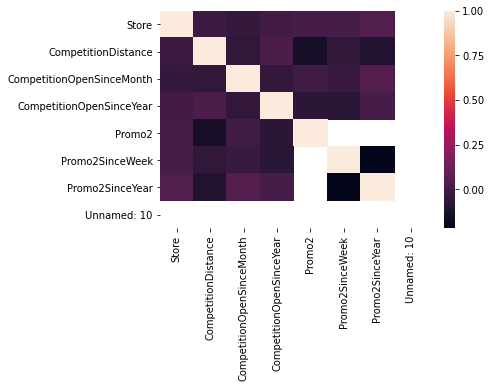

In [15]:
#Correlation of Store Data
store_corr = store.corr()
sns.heatmap(store_corr)

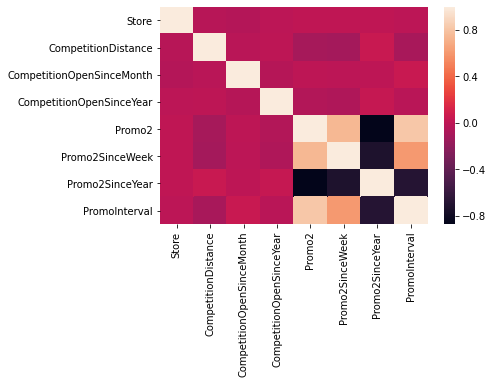

In [16]:
#Correlation of Clean Store Data
store_corr = store_clean.corr()
sns.heatmap(store_corr)

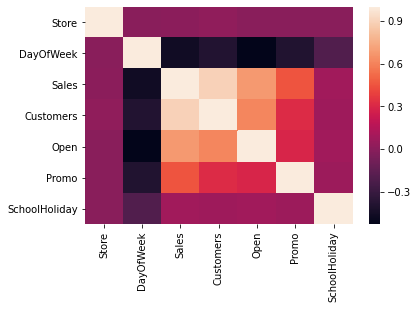

In [17]:
#Correlation of original Train Data
train_corr = train_og.corr()
sns.heatmap(train_corr)

In [18]:
train_og[train_og.columns[1:]].corr()['Sales'][:]

DayOfWeek       -0.462125
Sales            1.000000
Customers        0.894711
Open             0.678472
Promo            0.452345
SchoolHoliday    0.085124
Name: Sales, dtype: float64

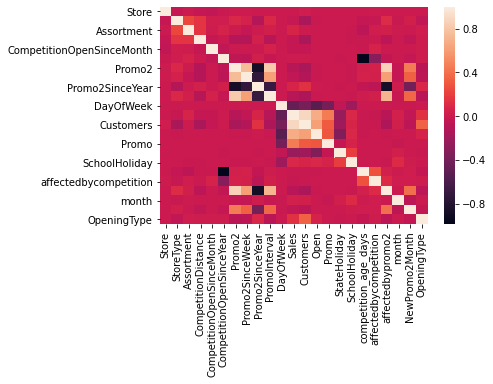

In [19]:
#Correlation of merged Train Data
merge_corr = train_clean.corr()
sns.heatmap(merge_corr)

In [20]:
train_clean[train_clean.columns[1:]].corr()['Sales'][:].sort_values(ascending=False)

Sales                        1.000000
Customers                    0.894711
Open                         0.678472
Promo                        0.452345
OpeningType                  0.138558
SchoolHoliday                0.085124
Assortment                   0.074941
Promo2SinceYear              0.073038
month                        0.048768
CompetitionOpenSinceYear     0.010115
competition_age_days        -0.002709
StoreType                   -0.013057
affectedbycompetition       -0.015717
CompetitionOpenSinceMonth   -0.023638
CompetitionDistance         -0.026074
Promo2SinceWeek             -0.042209
NewPromo2Month              -0.044955
affectedbypromo2            -0.080329
Promo2                      -0.091040
PromoInterval               -0.092635
StateHoliday                -0.229029
DayOfWeek                   -0.462125
Name: Sales, dtype: float64

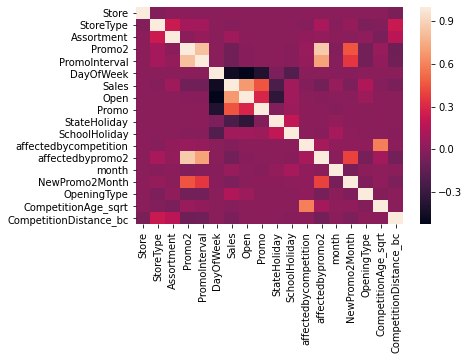

In [21]:
#Correlation of transformed Train Data
corr = trainset.corr()
sns.heatmap(corr)

In [22]:
trainset[trainset.columns[1:]].corr()['Sales'][:].sort_values(ascending=False)
#Sales has correlation with: 
#1. 'Open' (but it's useless) since if it's = 0 then 'Sales'=0
#2. 'Promo' : high positive correlation
#3. 'OpeningType' : positive correlation means more Sales by Store which opens everyday vs those which are closed on Sundays
#4. 'DayOfWeek' : high negative correlation means less Sales in the end of the week

Sales                     1.000000
Open                      0.678472
Promo                     0.452345
OpeningType               0.138558
SchoolHoliday             0.085124
Assortment                0.074941
month                     0.048768
StoreType                -0.013057
CompetitionAge_sqrt      -0.014261
affectedbycompetition    -0.015717
NewPromo2Month           -0.044955
CompetitionDistance_bc   -0.052601
affectedbypromo2         -0.080329
Promo2                   -0.091040
PromoInterval            -0.092635
StateHoliday             -0.229029
DayOfWeek                -0.462125
Name: Sales, dtype: float64

In [23]:
#set categorical type
category_columns = ["Store", "StoreType", "Assortment", "DayOfWeek", "PromoInterval", "OpeningType", "month", 
                           "NewPromo2Month", "affectedbycompetition", "affectedbypromo2", "StateHoliday",
                           "SchoolHoliday", "Promo", "Promo2"]
        
for column in category_columns:
    trainset[column] = trainset[column].astype('category')

In [25]:
#using dummy variable
dum_df = pd.get_dummies(trainset, columns=["StoreType", "Assortment", "DayOfWeek", "PromoInterval", 
                    "OpeningType", "month", "StateHoliday"])

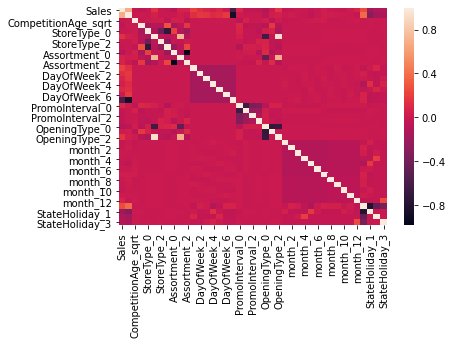

In [26]:
#Correlation of transformed Train Data
dum_corr = dum_df.corr()
sns.heatmap(dum_corr)

In [27]:
#only check "Open" == 1
dum_df = dum_df[dum_df["Open"] == 1]
dum_df = dum_df.drop(["Open"], axis = 1)
dum_df[dum_df.columns[1:]].corr()['Sales'][:].sort_values(ascending=False)

Sales                     1.000000
DayOfWeek_1               0.179143
OpeningType_2             0.157532
StoreType_1               0.144608
month_12                  0.134188
PromoInterval_0           0.127596
Assortment_2              0.103280
Assortment_1              0.053755
DayOfWeek_7               0.026728
DayOfWeek_2               0.019366
month_11                  0.019113
DayOfWeek_5               0.016728
month_5                   0.015741
StateHoliday_1            0.014154
StateHoliday_2            0.012380
month_4                   0.009566
StateHoliday_3            0.008237
month_6                   0.004822
month_3                   0.002267
month_7                  -0.000306
StoreType_2              -0.002912
StoreType_0              -0.010620
CompetitionAge_sqrt      -0.018937
StateHoliday_0           -0.019608
OpeningType_1            -0.020871
month_8                  -0.025916
DayOfWeek_4              -0.026407
StoreType_3              -0.028561
month_10            

In [28]:
#check only day of week
day = dum_df.loc[:,["Store","Date","DayOfWeek_1","DayOfWeek_2","DayOfWeek_3","DayOfWeek_4","DayOfWeek_5","DayOfWeek_6","DayOfWeek_7","Sales"]]
day[day.columns[1:]].corr()['Sales'][:].sort_values(ascending=False)

Sales          1.000000
DayOfWeek_1    0.179143
DayOfWeek_7    0.026728
DayOfWeek_2    0.019366
DayOfWeek_5    0.016728
DayOfWeek_4   -0.026407
DayOfWeek_3   -0.032928
DayOfWeek_6   -0.157892
Name: Sales, dtype: float64

In [29]:
#check only StateHoliday
holiday = dum_df.loc[:,["Store","Date","StateHoliday_0","StateHoliday_1","StateHoliday_2","StateHoliday_3","Sales"]]
holiday[holiday.columns[1:]].corr()['Sales'][:].sort_values(ascending=False)

Sales             1.000000
StateHoliday_1    0.014154
StateHoliday_2    0.012380
StateHoliday_3    0.008237
StateHoliday_0   -0.019608
Name: Sales, dtype: float64

In [32]:
#check only month
month = dum_df.loc[:,["Store","Date","month_1","month_2","month_3","month_4","month_5","month_6","month_7","month_8","month_9","month_10","month_11","month_12","Sales"]]
month[month.columns[1:]].corr()['Sales'][:].sort_values(ascending=False)

Sales       1.000000
month_12    0.134188
month_11    0.019113
month_5     0.015741
month_4     0.009566
month_6     0.004822
month_3     0.002267
month_7    -0.000306
month_8    -0.025916
month_10   -0.029487
month_9    -0.033880
month_2    -0.038244
month_1    -0.042599
Name: Sales, dtype: float64

In [33]:
#check only StateHoliday
StoreType = dum_df.loc[:,["Store","Date","StoreType_0","StoreType_1","StoreType_2","StoreType_3","Sales"]]
StoreType[StoreType.columns[1:]].corr()['Sales'][:].sort_values(ascending=False)

Sales          1.000000
StoreType_1    0.144608
StoreType_2   -0.002912
StoreType_0   -0.010620
StoreType_3   -0.028561
Name: Sales, dtype: float64

In [34]:
#check only StateHoliday
Assortment = dum_df.loc[:,["Store","Date","Assortment_0","Assortment_1","Assortment_2","Sales"]]
Assortment[Assortment.columns[1:]].corr()['Sales'][:].sort_values(ascending=False)

Sales           1.000000
Assortment_2    0.103280
Assortment_1    0.053755
Assortment_0   -0.113718
Name: Sales, dtype: float64

In [35]:
#check only StateHoliday
PromoInterval = dum_df.loc[:,["Store","Date","PromoInterval_0","PromoInterval_1","PromoInterval_2","PromoInterval_3","Sales"]]
PromoInterval[PromoInterval.columns[1:]].corr()['Sales'][:].sort_values(ascending=False)

Sales              1.000000
PromoInterval_0    0.127596
PromoInterval_1   -0.046923
PromoInterval_2   -0.061705
PromoInterval_3   -0.077582
Name: Sales, dtype: float64

In [36]:
#check only StateHoliday
OpeningType = dum_df.loc[:,["Store","Date","OpeningType_0","OpeningType_1","OpeningType_2","Sales"]]
OpeningType[OpeningType.columns[1:]].corr()['Sales'][:].sort_values(ascending=False)

Sales            1.000000
OpeningType_2    0.157532
OpeningType_1   -0.020871
OpeningType_0   -0.097399
Name: Sales, dtype: float64